In [6]:
!pip install pandas
!pip install graphviz
!pip install lingam

     |████████████████████████████████| 58 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 22.2 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 5.1 MB/s eta 0:00:01


In [14]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(1)


x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

model = lingam.DirectLiNGAM()
model.fit(X)
dot = make_dot(model.adjacency_matrix_)

# Save png
dot.format = 'png'
dot.render('dag')


['1.19.5', '1.1.5', '0.17', '1.5.4']


'dag.png'

In [17]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  3.012,  0.   ,  0.   ],
       [ 2.905,  0.   ,  1.939,  0.072,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  5.983,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.999,  0.   , -1.   ,  0.   ,  0.   ,  0.   ],
       [ 3.953,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [16]:
X

,x0,x1,x2,x3,x4,x5
0,2.016563,13.024898,3.307934,0.417022,13.269330,8.944978
1,2.469146,18.079538,4.863534,0.720324,15.212271,9.918525
2,0.735721,4.801649,0.879573,0.000114,5.406093,3.624759
3,1.719196,10.801673,2.761530,0.302333,11.448886,7.378852
4,0.676962,5.833430,1.713326,0.146756,4.145085,2.856089
...,...,...,...,...,...,...
9995,2.258937,17.060966,4.832959,0.694664,13.552105,9.438216
9996,1.342046,8.191588,2.048800,0.296231,9.602733,5.865204
9997,0.223790,2.893850,0.781661,0.059534,2.005051,1.660057
9998,1.020659,6.894393,1.618487,0.108044,7.083647,4.119833


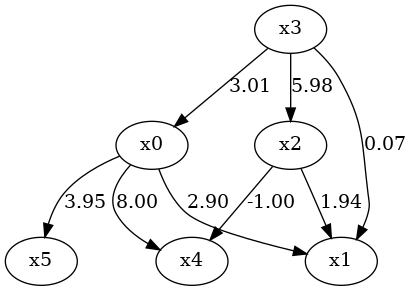

In [15]:
from IPython.display import Image
Image(filename='dag.png') 